<a href="https://colab.research.google.com/github/kj-95/google-colab/blob/main/Tesla_Stock_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [17]:
import io
data = pd.read_csv(io.BytesIO(uploaded['TSLA.csv']))
# Dataset is now stored in a Pandas Dataframe

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [19]:
!pip install pystan
!pip install fbprophet

In [14]:
from fbprophet import Prophet 

In [20]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-27,101.000000,105.160004,98.806000,102.872002,102.872002,71887000
1,2020-03-30,102.052002,103.330002,98.246002,100.426003,100.426003,59990500
2,2020-03-31,100.250000,108.592003,99.400002,104.800003,104.800003,88857500
3,2020-04-01,100.800003,102.790001,95.019997,96.311996,96.311996,66766000
4,2020-04-02,96.206001,98.851997,89.279999,90.893997,90.893997,99292000


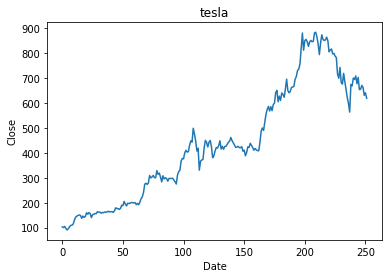

In [21]:
close=data['Close']
ax=close.plot(title='tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format = True)
data= data[["Date","Close"]]

In [22]:
data= data.rename(columns= {"Date":"ds", "Close": "y"})  

In [23]:
model=Prophet()
model.fit(data)
predict=model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2022-03-22,131.630090,-642.533559,885.615347
613,2022-03-23,129.584278,-646.369585,874.883993
614,2022-03-24,127.202999,-647.809615,885.506060
615,2022-03-25,125.492270,-671.139056,904.681732
616,2022-03-26,134.596307,-657.873550,904.546414


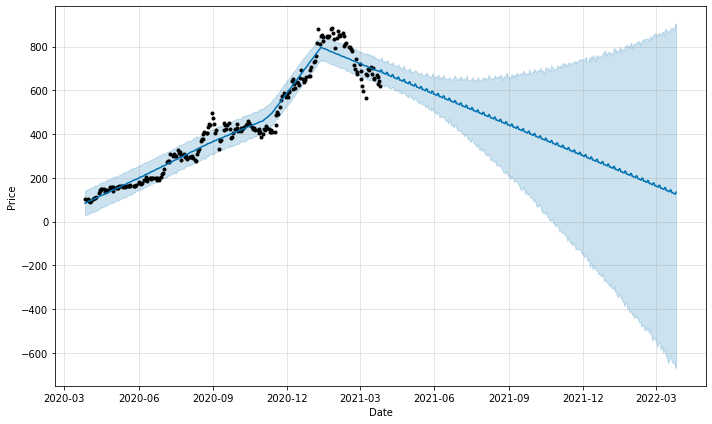

In [24]:
graph = model.plot(forcast,xlabel="Date", ylabel="Price")